In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Reddit_Data.csv')
df.head(5)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


# Exploratory Data Analysis

In [ ]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[8277, 13142, 15830]


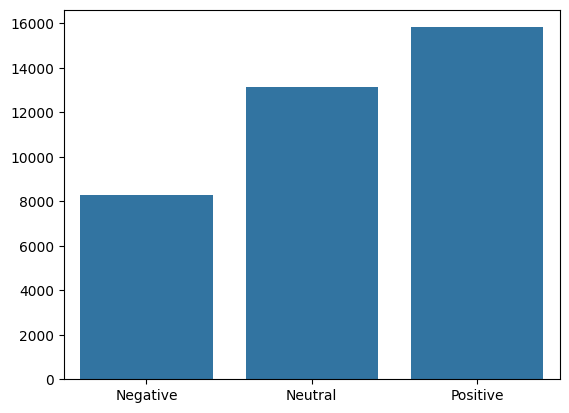

In [ ]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [ ]:
comment=list(df.clean_comment.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(comment,sentiment))

In [ ]:
print(list(reddit_dict.items())[:5])

[(' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ', 1), ('buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke 

In [ ]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)

In [ ]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg ', 'you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss '] 
 ['what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ', 'jesus was zen meets jew '] 
 [' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness e

In [ ]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [ ]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [ ]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

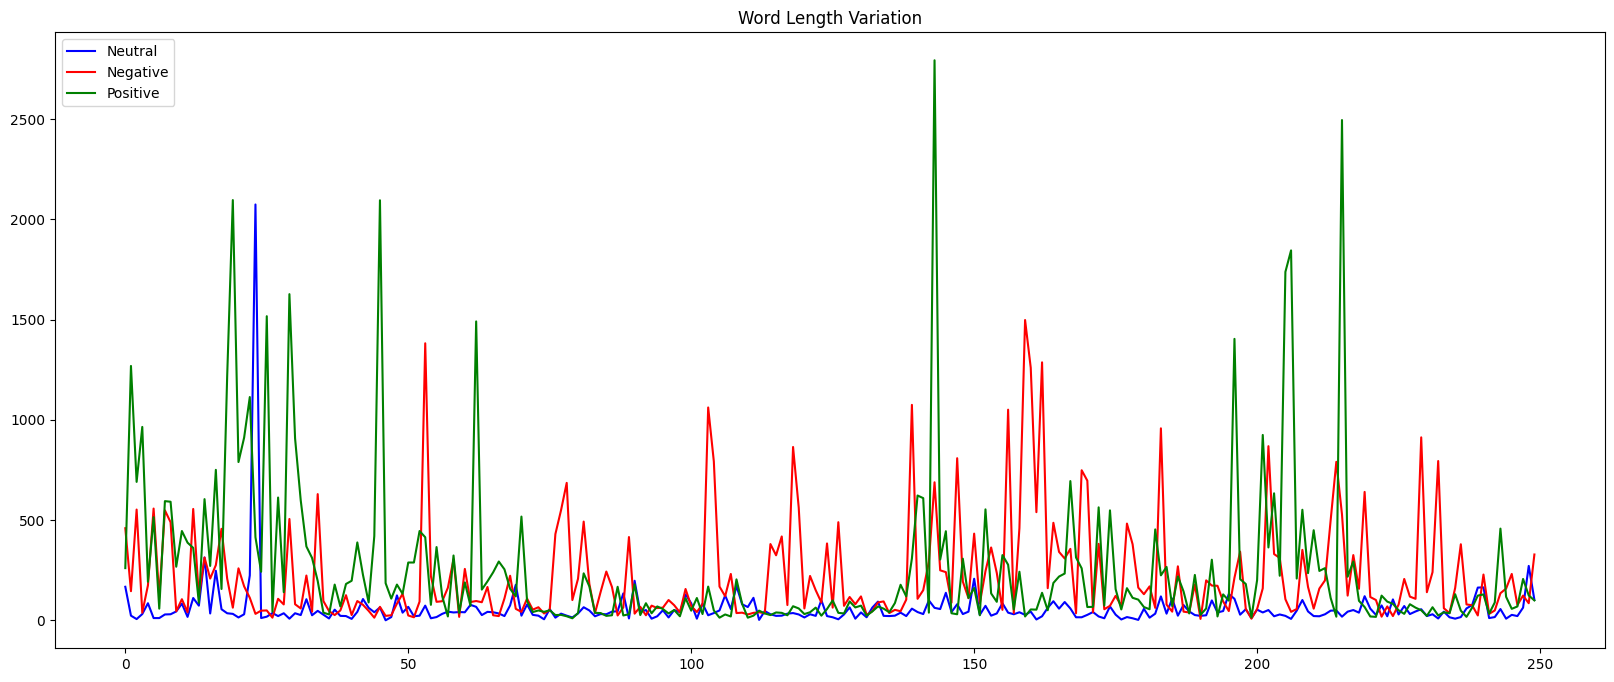

In [ ]:
plt.subplots(figsize=(20,8))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pos_mean=sum(pos_len)//len(pos_len)
neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

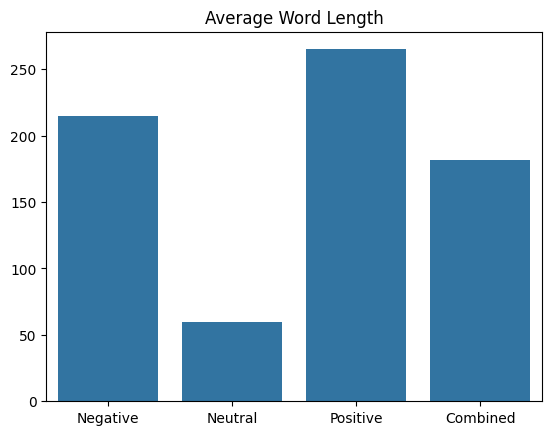

In [ ]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

# Tokeinzer


In [ ]:
from functools import reduce

# Assuming df is a DataFrame with a 'clean_comment' column
X = df['clean_comment'].astype('str')

# Concatenate all cleaned comments into a single string using map() and reduce()
lp = reduce(lambda x, y: x + " " + y, map(str, X))

print(lp[:100])  # Displaying the first 100 characters of the concatenated string

# Split the concatenated string into individual words using split()
st = lp.split(' ')

# Calculate the number of unique words (dictionary length)
dict_len = len(set(st))

 family mormon have never tried explain them they still stare puzzled from time time like some kind 


In [ ]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [ ]:

import json
tokenizer_json = tokenizer.to_json()
with open('/content/drive/MyDrive/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
len(tokenizer.word_index)


54720

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

In [ ]:

X_train[:2]

[[255,
  27343,
  11,
  123,
  642,
  871,
  40,
  10,
  95,
  12295,
  16336,
  24,
  54,
  54,
  22,
  43,
  290,
  4165,
  14016,
  7561,
  10,
  11,
  129,
  3150,
  6,
  2,
  5394,
  19936,
  11063,
  6437,
  3,
  4417,
  11,
  1440,
  19,
  2,
  112,
  1519,
  8055],
 [1519,
  20,
  78,
  73,
  83,
  7127,
  12,
  2851,
  454,
  1144,
  4,
  7128,
  3,
  1710,
  8,
  383,
  2,
  45,
  93,
  1710,
  1857,
  2984,
  112,
  961,
  91,
  88,
  26,
  191,
  112,
  2,
  202,
  79,
  1320,
  5,
  36,
  263,
  2984,
  112,
  4,
  39,
  19937,
  12,
  303,
  14,
  3,
  2984,
  112,
  4,
  19937,
  13,
  182,
  2,
  2852,
  2381,
  1519,
  120,
  60,
  246,
  709,
  303,
  19,
  5184,
  14,
  3,
  19938,
  1407,
  1469,
  8,
  2382,
  11,
  31,
  102,
  4290,
  28,
  363,
  13,
  17,
  26,
  190,
  285,
  76,
  92,
  1469,
  198,
  303,
  6438,
  11064,
  3,
  1519,
  303,
  79,
  891,
  6438,
  1145,
  280,
  36,
  60,
  228,
  1520,
  2,
  112,
  2381,
  87,
  3,
  67,
  33,
  882,
  20,

# One Hot Encode The Sentiment Values

In [ ]:
df['category']=df['category'].replace({-1:2})

In [ ]:
mp={0:"Neutral",1:"Positve",2:"Negative"}

In [ ]:
Y=df['category'].values

In [ ]:
Y_hot=to_categorical(Y)

In [ ]:
print(Y_hot[:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# The Model

In [ ]:
model=Sequential()
model.add(Embedding(dict_len,64,input_length=175))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(175,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(350,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(700)))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 175, 64)           3554752   
                                                                 
 dropout (Dropout)           (None, 175, 64)           0         
                                                                 
 bidirectional (Bidirection  (None, 175, 350)          336000    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 175, 350)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 175, 700)          1962800   
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 175, 700)          0

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:
hist=model.fit(X_train_padded, Y_hot, epochs=5, validation_split=0.2, batch_size=87)

Epoch 1/5
343/343 [==============================] - 216s 595ms/step - loss: 0.7418 - accuracy: 0.6746 - val_loss: 0.5008 - val_accuracy: 0.7983
Epoch 2/5
343/343 [==============================] - 189s 551ms/step - loss: 0.4339 - accuracy: 0.8223 - val_loss: 0.4299 - val_accuracy: 0.8396
Epoch 3/5
343/343 [==============================] - 178s 520ms/step - loss: 0.3822 - accuracy: 0.8495 - val_loss: 0.4738 - val_accuracy: 0.8235
Epoch 4/5
343/343 [==============================] - 166s 483ms/step - loss: 0.2754 - accuracy: 0.8984 - val_loss: 0.3967 - val_accuracy: 0.8723
Epoch 5/5
343/343 [==============================] - 172s 502ms/step - loss: 0.1631 - accuracy: 0.9458 - val_loss: 0.3894 - val_accuracy: 0.8762


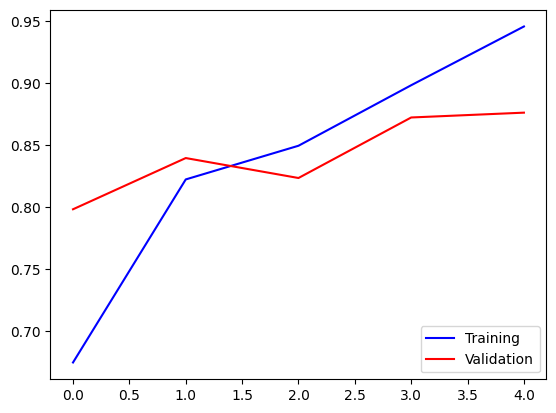

In [ ]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(hist.history)


{'loss': [0.7417994141578674, 0.43394196033477783, 0.3822444975376129, 0.27543753385543823, 0.16314978897571564], 'accuracy': [0.6745864152908325, 0.8223430514335632, 0.8495251536369324, 0.8983858227729797, 0.9458035230636597], 'val_loss': [0.500762939453125, 0.4299422800540924, 0.47375577688217163, 0.3967439532279968, 0.3893998861312866], 'val_accuracy': [0.7982550263404846, 0.8395973443984985, 0.8234899044036865, 0.872348964214325, 0.8762416243553162]}


# Check For Your Own Data

In [ ]:
import numpy as np

def predict(s):
    X_tes = [s]
    X_test = tokenizer.texts_to_sequences(X_tes)
    X_test_padded = pad_sequences(X_test, maxlen=175, padding='post', truncating='post')

    # Use np.argmax to get the index of the maximum value in the prediction array
    sent = int(np.argmax(model.predict(X_test_padded), axis=-1))

    print("The Predicted Sentiment is", mp[sent])

# Example usage:
text_input = "This is a positive review."
predict(text_input)


1/1 [==============================] - 2s 2s/step
The Predicted Sentiment is Positve


<ipython-input-32-2b8471da6fa4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sent = int(np.argmax(model.predict(X_test_padded), axis=-1))


In [ ]:
pol="The article is good but its not great moreover i would say you have done a decent job"
predict(pol)

1/1 [==============================] - 0s 32ms/step
The Predicted Sentiment is Positve


<ipython-input-32-2b8471da6fa4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sent = int(np.argmax(model.predict(X_test_padded), axis=-1))


In [ ]:
lop="You have done a stupid mistake which made you lose all the progress you made"
predict(lop)

1/1 [==============================] - 0s 30ms/step
The Predicted Sentiment is Negative


<ipython-input-32-2b8471da6fa4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sent = int(np.argmax(model.predict(X_test_padded), axis=-1))


In [ ]:
com="It aint hard work but its honest work"
predict(com)

1/1 [==============================] - 0s 31ms/step
The Predicted Sentiment is Positve


<ipython-input-32-2b8471da6fa4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sent = int(np.argmax(model.predict(X_test_padded), axis=-1))


In [ ]:
ppp="Lets Find out what this is going to be classified as"
predict(ppp)

1/1 [==============================] - 0s 33ms/step
The Predicted Sentiment is Neutral


<ipython-input-32-2b8471da6fa4>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sent = int(np.argmax(model.predict(X_test_padded), axis=-1))


In [ ]:
# prompt: download the model

model.save('/content/drive/MyDrive/Reddit_Model_Final.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 175, 64)           3554752   
                                                                 
 dropout (Dropout)           (None, 175, 64)           0         
                                                                 
 bidirectional (Bidirection  (None, 175, 350)          336000    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 175, 350)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 175, 700)          1962800   
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 175, 700)          0